Problem Description: I will be predicting rent prices using various features to help renters find affordable options as well as for budgeting purposes. It will make use of supervised learning to predict the rent price.

Data: The data I will be using is the apartments for rent classified dataset that contains many features of apartments that are available to rent. It can be found in the citation below:
Apartment for Rent Classified [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5X623.

The data has the option of using 10,000 samples, or 100,000 samples. In my case, I will opt for the 10,000 samples. There are 21 features in the dataset. There are 15 Categorical features and 6 numerical features. It contains features such as location, square feet, number of bedrooms and bathrooms, and even whether pets are allowed.

In [35]:
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
apartment_for_rent_classified = fetch_ucirepo(id=555) 

# Data (as pandas dataframes) 
X = apartment_for_rent_classified.data.features 
y = apartment_for_rent_classified.data.targets 

# Metadata 
print(apartment_for_rent_classified.metadata) 

# Variable information 
print(apartment_for_rent_classified.variables) 

{'uci_id': 555, 'name': 'Apartment for Rent Classified', 'repository_url': 'https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified', 'data_url': 'https://archive.ics.uci.edu/static/public/555/data.csv', 'abstract': 'This is a dataset of classified for apartments for rent in USA.\n', 'area': 'Business', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5X623', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that \r\ncolumn price and square_feet never is empty but the dataset is saved as it was created.\r\n\r\n

c:\Users\Dooma\AppData\Local\Programs\Python\Python313\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Data Cleaning:

In [36]:
import pandas as pd

# Fetch dataset
apartment_for_rent_classified = fetch_ucirepo(id=555)
df = apartment_for_rent_classified.data.features

# Define target and features
y = df['price']
X = df.drop(columns=['price'])

# Basic info
print("Rows, Columns:", df.shape)
print(df.info())  # Data types and non-null counts
print("\nMissing Values:\n", df.isnull().sum())  # Check NaNs
print("\nSummary Stats:\n", df.describe())  # Numeric columns stats

c:\Users\Dooma\AppData\Local\Programs\Python\Python313\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Rows, Columns: (99826, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 no

Let's remove irrelevant columns, handle missing values, and remove outliers. You'll notice in the first chart below, there are some outliers in the rent price. You'll also notice that some values like cityname and state have missing values.

c:\Users\Dooma\AppData\Local\Programs\Python\Python313\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


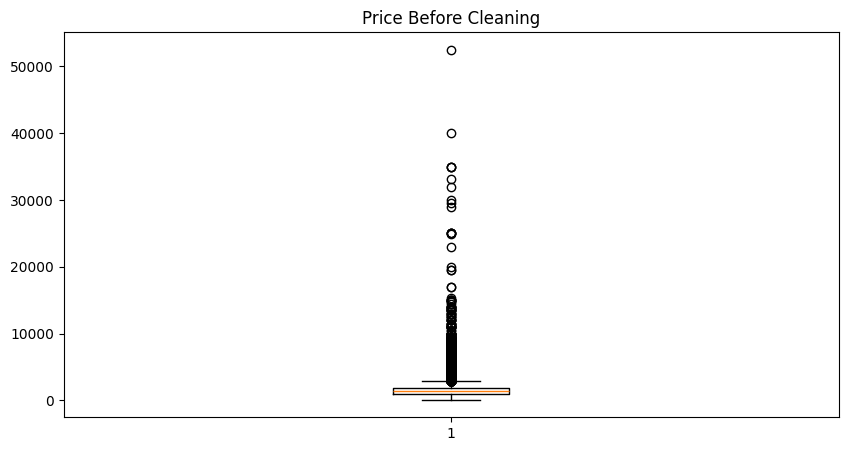

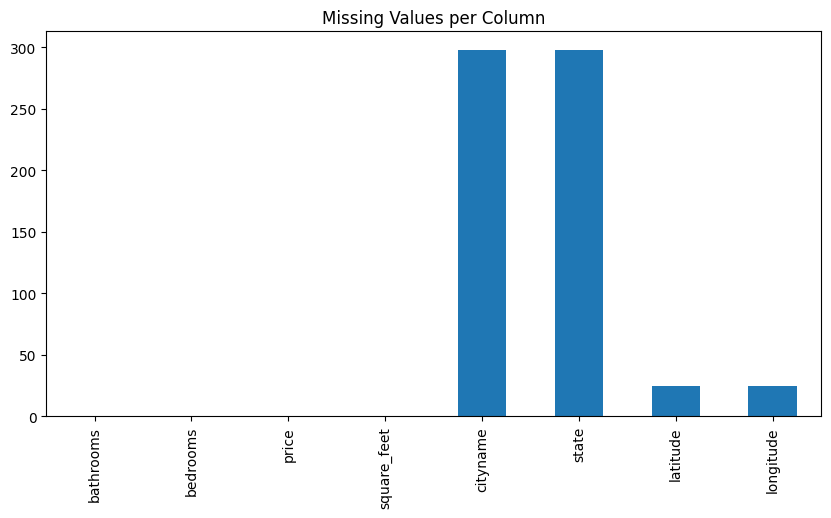

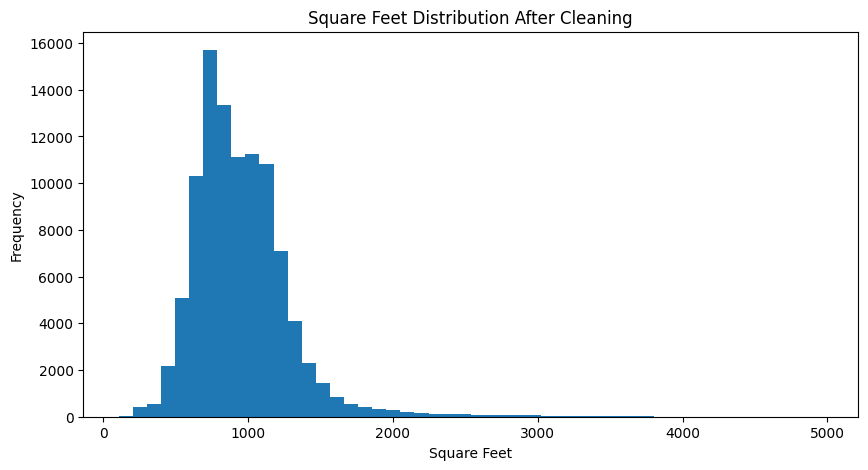

Rows, Columns after cleaning: (99544, 8)

Missing Values after cleaning:
 bathrooms        0
bedrooms         0
price            0
square_feet      0
cityname       298
state          298
latitude        25
longitude       25
dtype: int64

Summary Stats after cleaning:
           bathrooms      bedrooms         price   square_feet      latitude  \
count  99544.000000  99544.000000  99544.000000  99544.000000  99519.000000   
mean       1.443723      1.726613   1515.550822    953.303454     36.951737   
std        0.540363      0.745183    759.263172    346.442196      4.599494   
min        1.000000      0.000000    100.000000    107.000000     19.573800   
25%        1.000000      1.000000   1014.750000    730.000000     33.746500   
50%        1.000000      2.000000   1350.000000    900.000000     37.256200   
75%        2.000000      2.000000   1795.000000   1115.000000     39.954200   
max        7.000000      9.000000  10000.000000   4970.000000     64.833200   

          longitu

In [37]:
import matplotlib.pyplot as plt

# Fetch dataset
apartment_for_rent_classified = fetch_ucirepo(id=555)
df = apartment_for_rent_classified.data.features

# Drop irrelevant columns
df = df.drop(columns=['category', 'title', 'body', 'source', 'time', 'currency', 'price_display', 'price_type', 'fee', 'has_photo', 'address'])

# Handle missing values
df = df.dropna(subset=['price', 'square_feet'])
df = df.drop(columns=['pets_allowed', 'amenities'])

# Fix data types
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df = df.dropna(subset=['square_feet', 'bedrooms', 'bathrooms'])

# Remove outliers
plt.figure(figsize=(10, 5))
plt.boxplot(df['price'].dropna())
plt.title("Price Before Cleaning")
plt.show()

df = df[(df['price'].between(100, 10000)) & (df['square_feet'].between(100, 5000))]

# Visualizations
plt.figure(figsize=(10, 5))
df.isnull().sum().plot.bar()
plt.title("Missing Values per Column")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(df['square_feet'], bins=50)
plt.title("Square Feet Distribution After Cleaning")
plt.xlabel("Square Feet")
plt.ylabel("Frequency")
plt.show()

# Post-cleaning stats
print("Rows, Columns after cleaning:", df.shape)
print("\nMissing Values after cleaning:\n", df.isnull().sum())
print("\nSummary Stats after cleaning:\n", df.describe())

Exploratory Data Analysis:
Below I'll be plotting the rent prices and their frequency to determine which prices are most common. Second, I'm going to plot rent prices vs square feet, as I suspect that feature to be highly related to the rent price. Lastly, I will create a correlation matrix to confirm which features are most related to the rent price.

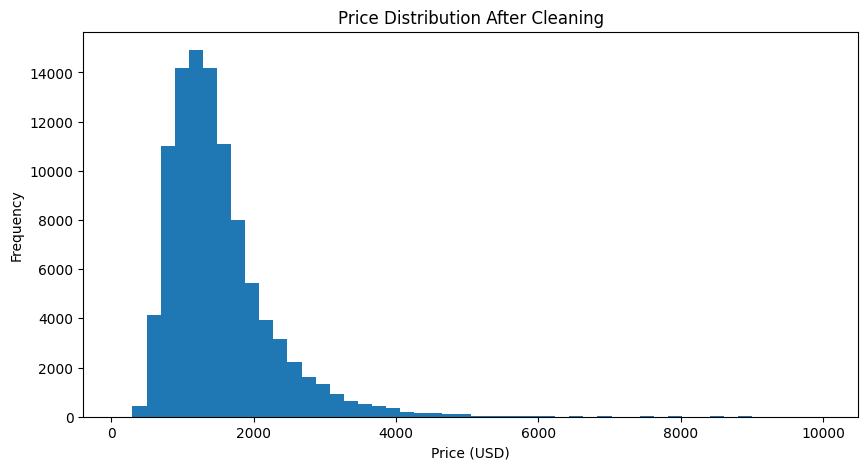

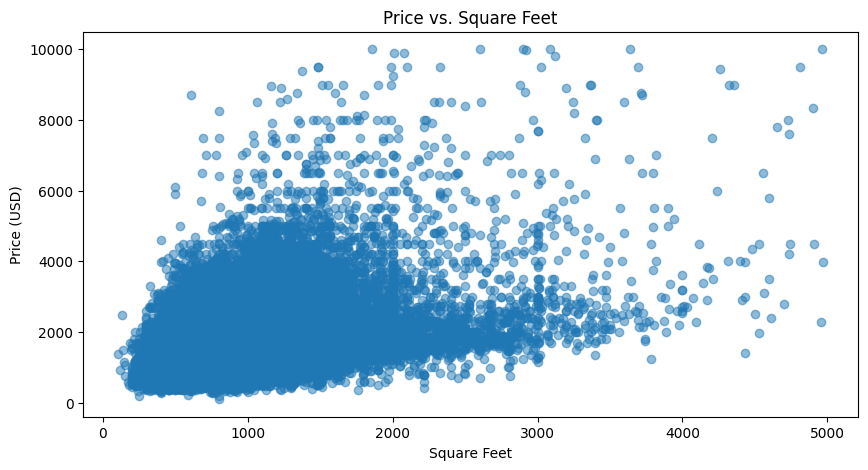

Correlation Matrix:
                 price  square_feet  bedrooms  bathrooms  latitude  longitude
price        1.000000     0.384709  0.239832   0.319625  0.076675  -0.109323
square_feet  0.384709     1.000000  0.717212   0.720545 -0.036011   0.072968
bedrooms     0.239832     0.717212  1.000000   0.677296  0.013759   0.040214
bathrooms    0.319625     0.720545  0.677296   1.000000 -0.090927  -0.009605
latitude     0.076675    -0.036011  0.013759  -0.090927  1.000000   0.078659
longitude   -0.109323     0.072968  0.040214  -0.009605  0.078659   1.000000


In [38]:
# Histogram of price
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50)
plt.title("Price Distribution After Cleaning")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of price vs. square_feet
plt.figure(figsize=(10, 5))
plt.scatter(df['square_feet'], df['price'], alpha=0.5)
plt.title("Price vs. Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Price (USD)")
plt.show()

# Correlation matrix
corr_matrix = df[['price', 'square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude']].corr()
print("Correlation Matrix:\n", corr_matrix)

As you can see from the correlation matrix, square_fet does indeed look like the feature with the most correlation. From the results I can conclude that square feet has the most influence on the rent price.

Models:

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

# Select features and target
features = ['square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude']
X = df[features]
y = df['price']

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Log-transform the target variable to handle skewness
y_log = np.log1p(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)

# Train models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Results and Analysis

Performance Metrics:
| Model              | Train RMSE | Test RMSE | Train R^2 | Test R^2 |
|--------------------|------------|-----------|----------|---------|
| Linear Regression  | 704.92      | 690.44     | 0.14    | 0.16   |
| Decision Tree      | 61.63      | 375.78     | 0.99    | 0.75   |


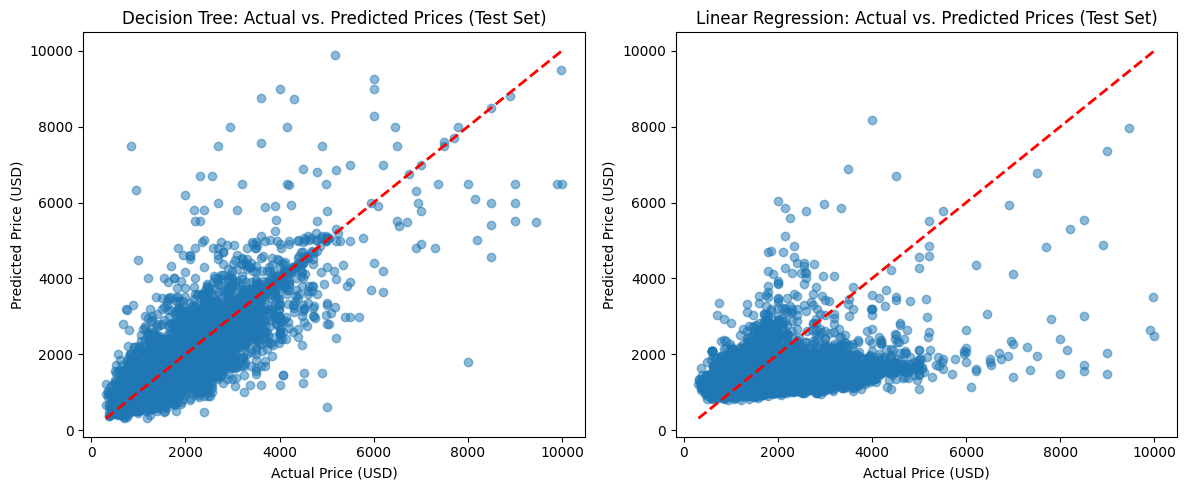

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# y_train and y_test are log-transformed
y_train_exp = np.expm1(y_train)
y_test_exp = np.expm1(y_test)

# Predictions (in log scale)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Reverse the log transformation for predictions
y_train_pred_lr_exp = np.expm1(y_train_pred_lr)
y_test_pred_lr_exp = np.expm1(y_test_pred_lr)
y_train_pred_dt_exp = np.expm1(y_train_pred_dt)
y_test_pred_dt_exp = np.expm1(y_test_pred_dt)

# Compute RMSE and R^2
train_rmse_lr = np.sqrt(mean_squared_error(y_train_exp, y_train_pred_lr_exp))
test_rmse_lr = np.sqrt(mean_squared_error(y_test_exp, y_test_pred_lr_exp))
train_r2_lr = r2_score(y_train_exp, y_train_pred_lr_exp)
test_r2_lr = r2_score(y_test_exp, y_test_pred_lr_exp)

train_rmse_dt = np.sqrt(mean_squared_error(y_train_exp, y_train_pred_dt_exp))
test_rmse_dt = np.sqrt(mean_squared_error(y_test_exp, y_test_pred_dt_exp))
train_r2_dt = r2_score(y_train_exp, y_train_pred_dt_exp)
test_r2_dt = r2_score(y_test_exp, y_test_pred_dt_exp)

# Print results table
print("Performance Metrics:")
print("| Model              | Train RMSE | Test RMSE | Train R^2 | Test R^2 |")
print("|--------------------|------------|-----------|----------|---------|")
print(f"| Linear Regression  | {train_rmse_lr:.2f}      | {test_rmse_lr:.2f}     | {train_r2_lr:.2f}    | {test_r2_lr:.2f}   |")
print(f"| Decision Tree      | {train_rmse_dt:.2f}      | {test_rmse_dt:.2f}     | {train_r2_dt:.2f}    | {test_r2_dt:.2f}   |")

# Scatter plots
plt.figure(figsize=(12, 5))

# Decision Tree scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_exp, y_test_pred_dt_exp, alpha=0.5)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'r--', lw=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Decision Tree: Actual vs. Predicted Prices (Test Set)')

# Linear Regression scatter plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_exp, y_test_pred_lr_exp, alpha=0.5)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'r--', lw=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Linear Regression: Actual vs. Predicted Prices (Test Set)')

plt.tight_layout()
plt.show()

Discussion and Conclusion:
For my project, I investigated features that can help predict rent prices of apartments. From my investigation, I learned the square feet, as suspected, has the most influence on prices. I also developed a model that attempts to predict the price using related features such as that. This project was quite valuable in taking me through the whole process of supervised learning. From picking a dataset, to cleaning the data, and then investigating different features and models to predict a desired feature such as price. The simpler model, linear regression, did not work all that well at predicting the price. This likely means that that were some non-linear relationships between some of the features. For improvements, I could try using more complex models, like random forest or gradient boosting.